<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/Weights_heights_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXPLANATORY DATA ANALYSIS

In [ ]:
# 1. Import Necessary Libraries
# We import libraries to help us do cool stuff with data

In [ ]:
import pandas as pd  # pandas helps us work with data tables

In [ ]:
import numpy as np   # numpy is like a magic toolbox for numbers

In [ ]:
import matplotlib.pyplot as plt  # matplotlib lets us make graphs

In [ ]:
import seaborn as sns   # seaborn makes our graphs look pretty!

In [ ]:
# 2. Load the Data
# We load the data from a file into our computer so we can use it!

In [ ]:
df = pd.read_csv('/content/weights_heights.csv')  # We read the data from a CSV file

In [ ]:
# 3. Inspect the Data
# We look at the first few rows of our data to see what it looks like!

In [ ]:
print(df.head())  # This shows us the first few rows of our data

   Index    Height    Weight
0      1  65.78331  112.9925
1      2  71.51521  136.4873
2      3  69.39874  153.0269
3      4  68.21660  142.3354
4      5  67.78781  144.2971


In [ ]:
print(df.info())  # This tells us information about our data, like how many rows and columns it has

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   25000 non-null  int64  
 1   Height  25000 non-null  float64
 2   Weight  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB
None


In [ ]:
print(df.describe())  # This gives us some statistics about our data, like the average and range

              Index        Height        Weight
count  25000.000000  25000.000000  25000.000000
mean   12500.500000     67.993114    127.079421
std     7217.022701      1.901679     11.660898
min        1.000000     60.278360     78.014760
25%     6250.750000     66.704397    119.308675
50%    12500.500000     67.995700    127.157750
75%    18750.250000     69.272958    134.892850
max    25000.000000     75.152800    170.924000


In [ ]:
# 4. Check for Missing Values
# We check if there are any missing values in our data!

In [ ]:
print(df.isnull().sum())  # This tells us how many missing values we have in each column

Index     0
Height    0
Weight    0
dtype: int64


In [ ]:
# 5. Handle missing values
# We check for any missing information and fill in the gaps if needed
# For example, we can fill missing values with the average value of the column
# Replace missing values in each column with the mean of that column

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
# 6. Check for duplicates
# We ensure that there are no duplicate rows in our dataset

In [ ]:
duplicate_count_before = df.duplicated().sum()  # Count how many duplicate rows there are before removing them

In [ ]:
print("Number of duplicates before: ", duplicate_count_before)  # Show the count of duplicates before

Number of duplicates before:  0


In [ ]:
# 7. Handle duplicates
# We remove any duplicate rows from our dataset

In [ ]:
df.drop_duplicates(inplace=True)  # Remove duplicate rows from the dataset

In [ ]:
# 8. Visualize the Data (Histogram for Height and Weight)
# We make some graphs to help us see what our data looks like!

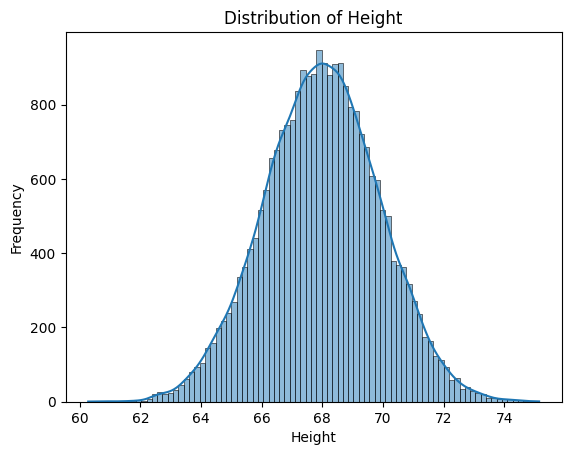

In [ ]:
sns.histplot(df['Height'], kde=True)  # This makes a graph showing the distribution of heights
plt.title('Distribution of Height')  # This gives our graph a title
plt.xlabel('Height')  # This labels the x-axis of our graph
plt.ylabel('Frequency')  # This labels the y-axis of our graph
plt.show()  # This shows our graph to us!

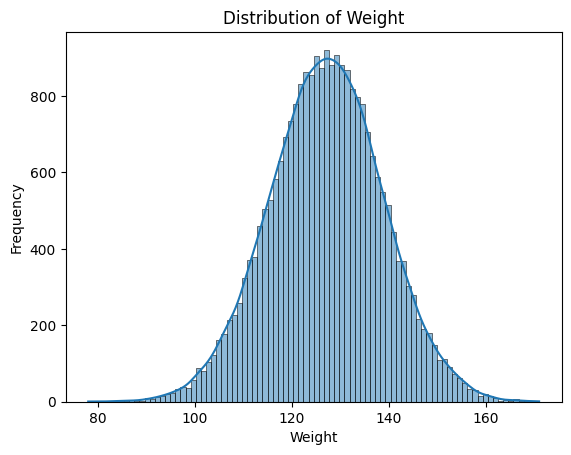

In [ ]:
sns.histplot(df['Weight'], kde=True)  # This makes a graph showing the distribution of weights
plt.title('Distribution of Weight')  # This gives our graph a title
plt.xlabel('Weight')  # This labels the x-axis of our graph
plt.ylabel('Frequency')  # This labels the y-axis of our graph
plt.show()  # This shows our graph to us!

In [ ]:
# 9. Encode categorical variables
# We convert categorical variables into numerical representations
# One common method is one-hot encoding, which creates binary columns for each category

In [ ]:
# Identify categorical columns

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns  # Select columns with object data type (strings)

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)  # One-hot encode categorical columns

In [ ]:
#  Check the new dataset after encoding

In [ ]:
print("Shape of original dataset: ", df.shape)  # Show the shape of the original dataset

Shape of original dataset:  (25000, 3)


In [ ]:
print("Shape of dataset after encoding categorical variables: ", df_encoded.shape)  # Show the shape of the dataset after encoding

Shape of dataset after encoding categorical variables:  (25000, 3)


In [ ]:
# 10. Check Correlations (Correlation matrix)
# We check if there are relationships between different parts of our data!

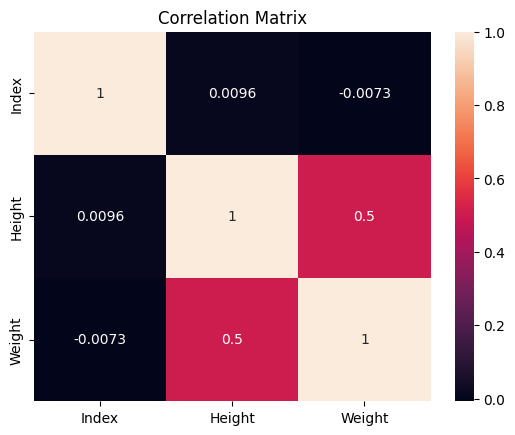

In [ ]:
sns.heatmap(df.corr(), annot=True)  # This makes a heatmap showing the relationships between different parts of our data
plt.title('Correlation Matrix')  # This gives our heatmap a title
plt.show()  # This shows our heatmap to us!

In [ ]:
# 11. Outlier Detection (Using IQR)
# We find and remove any unusual values in our data!

In [ ]:
Q1 = df.quantile(0.25)  # This finds the first quartile of our data

In [ ]:
Q3 = df.quantile(0.75)  # This finds the third quartile of our data

In [ ]:
IQR = Q3 - Q1  # This calculates the Interquartile Range (IQR) of our data

In [ ]:
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]  # This removes any rows with unusual values

In [ ]:
# 12. Feature Scaling (Standardization)
# We make sure all our data is on the same scale so our analysis works better!

In [ ]:
from sklearn.preprocessing import StandardScaler  # This helps us scale our data

In [ ]:
scaler = StandardScaler()  # This creates a scaler object

In [ ]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_outliers_removed), columns=df_outliers_removed.columns)  # This scales our data

In [ ]:
# Save the final preprocessed dataset
# We save our cleaned-up data so we can use it later!

In [ ]:
df_scaled.to_csv('preprocessed_data.csv', index=False)  # This saves our cleaned-up data to a new file

# **POSSIBLE TASKS FROM THE DATASET **

# DATA VISUALIZATION AND SIMPLE LINEAR REGRESSION

In [ ]:
# Importing necessary libraries
# We bring in some more tools to help us do more cool stuff with our data!

In [ ]:
import pandas as pd  # We already imported this above, but it's okay to do it again!

In [ ]:
import numpy as np   # We already imported this above, but it's okay to do it again!

In [ ]:
import matplotlib.pyplot as plt  # We already imported this above, but it's okay to do it again!

In [ ]:
import seaborn as sns   # We already imported this above, but it's okay to do it again!

In [ ]:
from sklearn.model_selection import train_test_split  # This helps us split our data into parts for training and testing

In [ ]:
from sklearn.linear_model import LinearRegression  # This helps us make a line that predicts one thing based on another thing

In [ ]:
from sklearn.metrics import mean_squared_error  # This helps us measure how good our predictions are

In [ ]:
# Load the data
# We load our data again so we can use it for a new analysis!

In [ ]:
df = pd.read_csv('/content/weights_heights.csv')  # We read the data from a CSV file

In [ ]:
# Visualize the distribution of height and weight using histograms
# We make some more graphs to help us understand our data better!

Text(0, 0.5, 'Frequency')

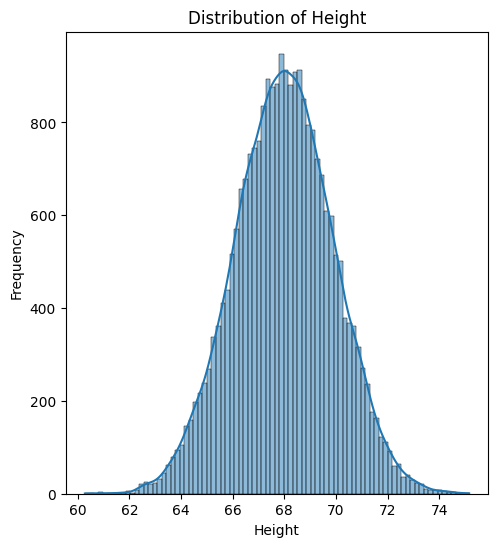

In [ ]:
plt.figure(figsize=(12, 6))  # This sets the size of our graph
plt.subplot(1, 2, 1)  # This sets up the first part of our graph
sns.histplot(df['Height'], kde=True)  # This makes a graph showing the distribution of heights
plt.title('Distribution of Height')  # This gives our graph a title
plt.xlabel('Height')  # This labels the x-axis of our graph
plt.ylabel('Frequency')  # This labels the y-axis of our graph

Text(0, 0.5, 'Frequency')

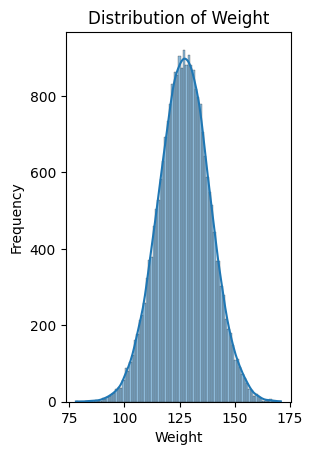

In [ ]:
plt.subplot(1, 2, 2)  # This sets up the second part of our graph
sns.histplot(df['Weight'], kde=True)  # This makes a graph showing the distribution of weights
plt.title('Distribution of Weight')  # This gives our graph a title
plt.xlabel('Weight')  # This labels the x-axis of our graph
plt.ylabel('Frequency')  # This labels the y-axis of our graph

In [ ]:
plt.tight_layout()  # This makes sure our graphs don't overlap
plt.show()  # This shows our graphs to us!

<Figure size 640x480 with 0 Axes>

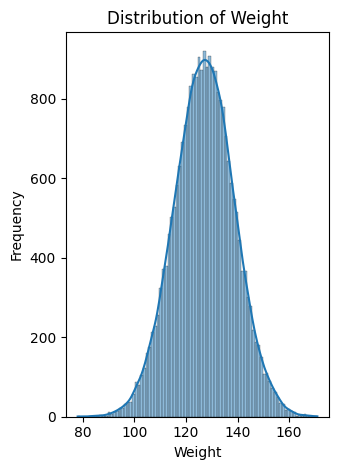

In [ ]:
plt.subplot(1, 2, 2)  # This sets up the second part of our graph
sns.histplot(df['Weight'], kde=True)  # This makes a graph showing the distribution of weights
plt.title('Distribution of Weight')  # This gives our graph a title
plt.xlabel('Weight')  # This labels the x-axis of our graph
plt.ylabel('Frequency')  # This labels the y-axis of our graph

plt.tight_layout()  # This makes sure our graphs don't overlap
plt.show()  # This shows our graphs to us!

In [ ]:
# Split the data into training and testing sets
# We split our data into parts so we can train our model on some parts and test it on others!

In [ ]:
X = df[['Height']]  # This is the part of our data we use to make predictions

In [ ]:
y = df['Weight']  # This is the part of our data we try to predict

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # This splits our data into training and testing parts

In [ ]:
# Fit a linear regression model
# We make a line that predicts weight based on height!

In [ ]:
model = LinearRegression()  # This creates a model object

In [ ]:
model.fit(X_train, y_train)  # This makes the model learn from our training data

LinearRegression()

In [ ]:
# Make predictions
# We use our model to make predictions on new data!

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Visualize the linear regression line
# We create a visualization to see how well our linear regression model predicts weight based on height.

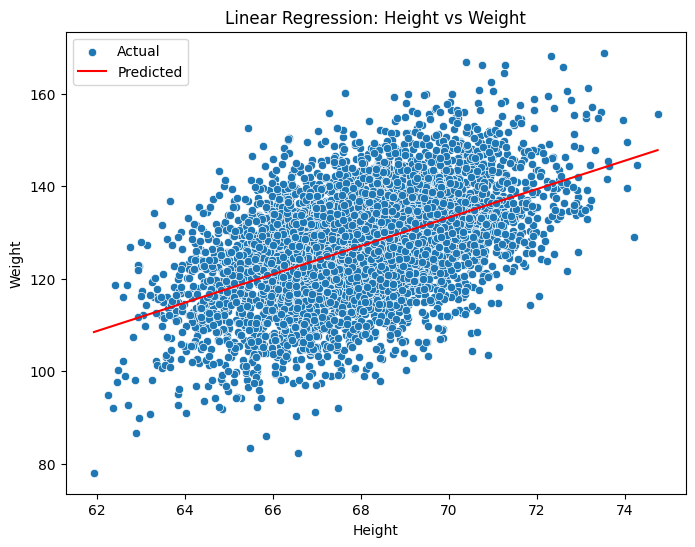

In [ ]:
plt.figure(figsize=(8, 6))  # This sets the size of our plot
sns.scatterplot(x=X_test['Height'], y=y_test, label='Actual')  # This plots the actual weight values against height
sns.lineplot(x=X_test['Height'], y=y_pred, color='red', label='Predicted')  # This plots the predicted weight values based on height
plt.title('Linear Regression: Height vs Weight')  # This sets the title of our plot
plt.xlabel('Height')  # This labels the x-axis of our plot
plt.ylabel('Weight')  # This labels the y-axis of our plot
plt.legend()  # This adds a legend to our plot to differentiate between actual and predicted values
plt.show()  # This displays our plot

In [ ]:
# Evaluate the model
# We check how well our predictions match the actual values!

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')  # This prints the mean squared error to help us understand how accurate our model is

Mean Squared Error: 102.48791003224964


# BOXPLOT VISUALIZATION

In [ ]:
# Boxplot Visualization

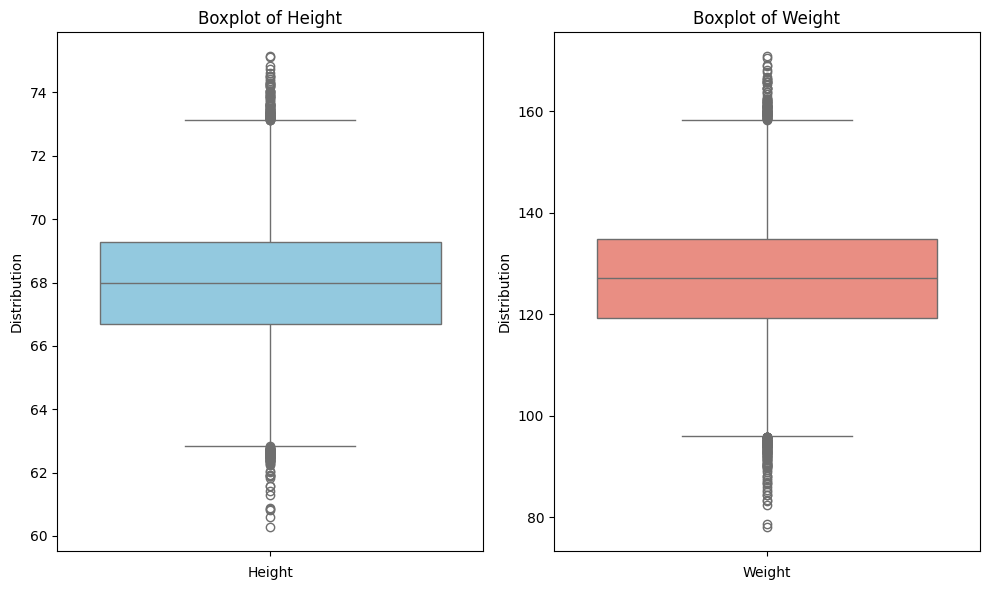

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot for height
sns.boxplot(y='Height', data=df, color='skyblue')  # Create boxplot for height
plt.title('Boxplot of Height')  # Set the title
plt.xlabel('Height')  # Set the x-axis label
plt.ylabel('Distribution')  # Set the y-axis label to represent distribution
plt.subplot(1, 2, 2)  # Create the second subplot for weight
sns.boxplot(y='Weight', data=df, color='salmon')  # Create boxplot for weight
plt.title('Boxplot of Weight')  # Set the title
plt.xlabel('Weight')  # Set the x-axis label
plt.ylabel('Distribution')  # Set the y-axis label to represent distribution
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

In [ ]:
# Description: This code segment creates boxplot visualizations to explore the distribution of height and weight separately. The boxplot for height shows the central tendency and spread of height values, while the boxplot for weight does the same for weight values. Boxplots are useful for detecting outliers and understanding the variability of the data. The separation into two subplots allows for a direct comparison of the distributions of height and weight.


# FEATURTE IMPORTANCE ANALYSIS

In [ ]:
# Feature Importance Analysis

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define features and target variable

In [ ]:

X = df.drop('Weight', axis=1)  # Features

In [ ]:
y = df['Weight']  # Target variable

In [ ]:
# Instantiate and fit the Random Forest Regressor model

In [ ]:
model = RandomForestRegressor()  # Random Forest Regressor model

In [ ]:
model.fit(X, y)  # Fit the model

RandomForestRegressor()

In [ ]:
# Obtain feature importance scores

In [ ]:
feature_importance = model.feature_importances_  # Feature importance scores

In [ ]:
features = X.columns  # Feature names

In [ ]:
# Plotting feature importance

<ipython-input-165-659b1bf3ec13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')  # Create bar plot


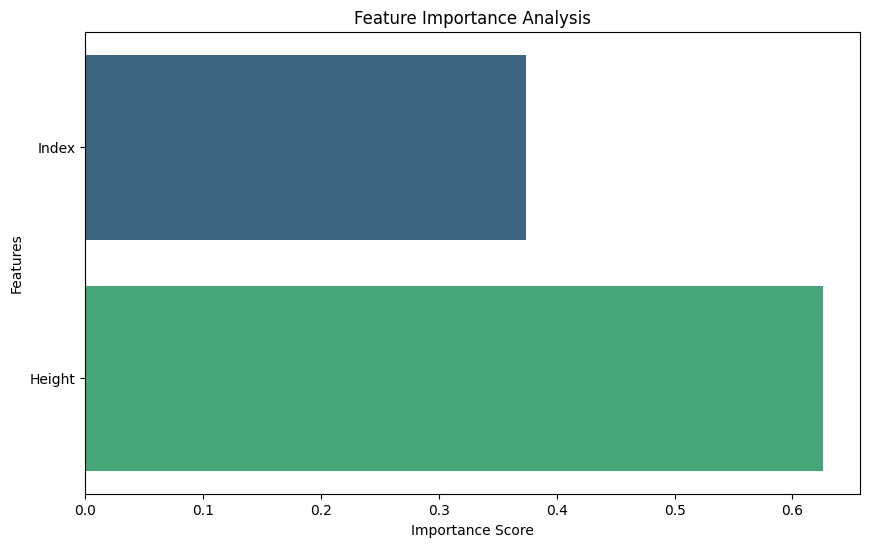

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=feature_importance, y=features, palette='viridis')  # Create bar plot
plt.title('Feature Importance Analysis')  # Set the title
plt.xlabel('Importance Score')  # Set the x-axis label
plt.ylabel('Features')  # Set the y-axis label
plt.savefig('feature_importance_analysis.png')  # Save the plot as a PNG file
plt.show()  # Show the plot

# MODEL COMPARISON

In [ ]:
# Model Comparison

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Define models

In [ ]:
models = {'Linear Regression': LinearRegression(),  # Define a linear regression model
          'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())}  # Define a polynomial regression model


In [ ]:
# Split data

In [ ]:
X = df[['Height']]  # Features (only considering height for simplicity)

In [ ]:
y = df['Weight']  # Target variable (weight)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets


In [ ]:
# Evaluate models

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

In [ ]:
 y_pred = model.predict(X_test)  # Make predictions

In [ ]:
 mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error

In [ ]:
print(f'{name} - Mean Squared Error: {mse}')  # Print the mean squared error for each model

Polynomial Regression - Mean Squared Error: 102.49319741515798


In [ ]:
    # Plotting model predictions

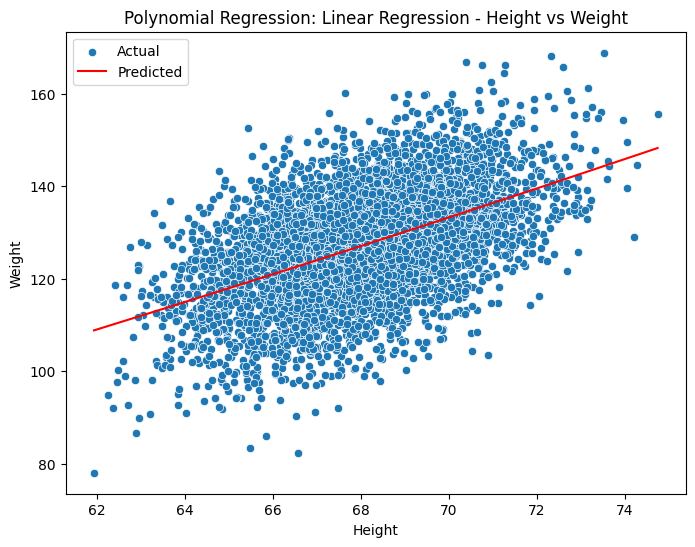

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x=X_test['Height'], y=y_test, label='Actual')  # Plot actual weight values against height
sns.lineplot(x=X_test['Height'], y=y_pred, color='red', label='Predicted')  # Plot predicted weight values based on height
plt.title(f'{name}: Linear Regression - Height vs Weight')  # Set the title of the plot
plt.xlabel('Height')  # Set the x-axis label
plt.ylabel('Weight')  # Set the y-axis label
plt.legend()  # Add legend
plt.savefig(f'{name}_prediction_plot.png')  # Save the plot as a PNG file
plt.show()  # Show the plot